# **Recurrent Neural Network(RNN)**
Long Short-Term Memory layer

https://sebastianraschka.com/blog/2020/intro-to-dl-ch01.html 

https://medium.datadriveninvestor.com/a-high-level-introduction-to-lstms-34f81bfa262d

https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

## **Load packages**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

## **Load Dataset**
movie reviews

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17473536/17464789 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(25000,)

In [4]:
padded_inputs = pad_sequences(x_train, maxlen=300, value = 0.0)
padded_inputs_test = pad_sequences(x_test, maxlen=300, value = 0.0) 

In [5]:
padded_inputs.shape

(25000, 300)

## **Build, train, and evaluate model**

In [6]:
def run_model(epochs, title):
    # Build model
    model = Sequential()
    model.add(Embedding(5000, 15, input_length=300))
    model.add(LSTM(10))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    
    # Train model
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
    history = model.fit(padded_inputs, y_train, batch_size=128, epochs=epochs, verbose=1, validation_split=0.2)
    
    # Evaluate model
    test_loss, test_acc = model.evaluate(padded_inputs_test, y_test, verbose=False)
    print("accuarcy of test dataset:"+str(test_acc))
    print("loss of test dataset:"+str(test_loss))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.savefig(title)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 15)           75000     
                                                                 
 lstm (LSTM)                 (None, 10)                1040      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 76,051
Trainable params: 76,051
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
157/157 [==============================] - 17s 89ms/step - loss: 0.5710 - accuracy: 0.7122 - val_loss: 0.4425 - val_accuracy: 0.8024
Epoch 2/10
157/157 [==============================] - 13s 83ms/step - loss: 0.3426 - accuracy: 0.8688 - val_loss: 0.3464 - val_accuracy: 0.8604
Epoch 3/10
157/157 [===

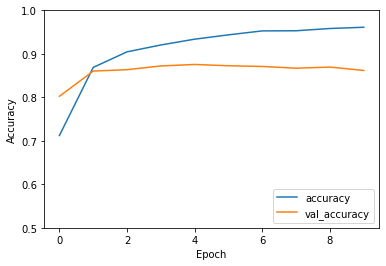

In [8]:
run_model(10, '10 epochs.png')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 15)           75000     
                                                                 
 lstm_1 (LSTM)               (None, 10)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 76,051
Trainable params: 76,051
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
157/157 [==============================] - 17s 90ms/step - loss: 0.6204 - accuracy: 0.6478 - val_loss: 0.4567 - val_accuracy: 0.8258
Epoch 2/20
157/157 [==============================] - 13s 82ms/step - loss: 0.3721 - accuracy: 0.8571 - val_loss: 0.3441 - val_accuracy: 0.8600
Epoch 3/20
157/157 [=

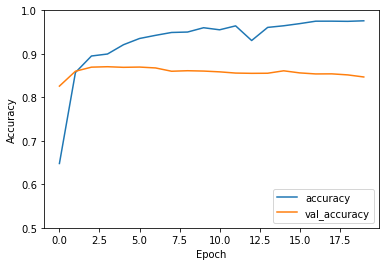

In [10]:
run_model(20, '20 epochs.png')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 15)           75000     
                                                                 
 lstm_2 (LSTM)               (None, 10)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 76,051
Trainable params: 76,051
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
157/157 [==============================] - 16s 85ms/step - loss: 0.5989 - accuracy: 0.6997 - val_loss: 0.4672 - val_accuracy: 0.8196
Epoch 2/30
157/157 [==============================] - 13s 82ms/step - loss: 0.3897 - accuracy: 0.8505 - val_loss: 0.3844 - val_accuracy: 0.8406
Epoch 3/30
157/157 [=

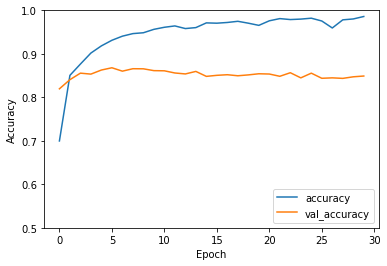

In [11]:
run_model(30, '30 epochs.png')

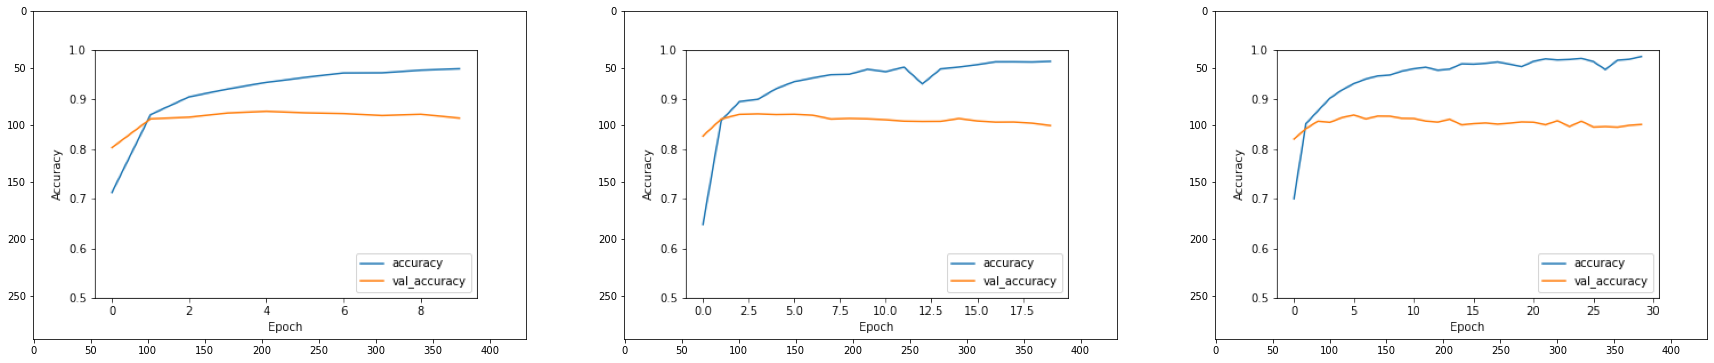

In [18]:
# Plot all images in a same plane
import matplotlib.pyplot as plt
from PIL import Image

img1 = Image.open("10 epochs.png")
img2 = Image.open("20 epochs.png")
img3 = Image.open("30 epochs.png")

figure, axes = plt.subplots(1, 3, figsize=(30, 30))
figure.figsize = (12, 15)
axes[0].imshow(img1)
axes[1].imshow(img2)
axes[2].imshow(img3)

Explanation:<br>
When the iteration increases
* The training accuracy increases but the difference is increasingly subtle.
* The validation accuracy hardly witnesses improvement, which may indicate that the model reached the end of its ability
* Some potential solutions:
    - Try larger training data
    - Increase the padding size
    - Try different model architecture: Transformer.